<a href="https://colab.research.google.com/github/leechanhoe/deep-learning-project/blob/master/batch_Normalization_%EC%A0%81%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [2]:
from keras.utils import to_categorical

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
from keras.preprocessing.image import ImageDataGenerator
import keras

# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     )
# datagen.fit(train_images)

# def lr_schedule(epoch):
#     lrate = 0.001
#     if epoch > 25:
#         lrate = 0.0005
#     if epoch > 50:
#         lrate = 0.0003
#     if epoch > 75:
#         lrate = 0.0001
#     return lrate

checkpoint = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
# 5번의 연속적인 epoch 동안 개선이 없을 때 학습이 중단되도록 함
early_stopping = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [6]:
from keras.callbacks import LearningRateScheduler

# 변형된 이미지 추가 버전
# history = model.fit(datagen.flow(train_images, train_labels, batch_size=128), epochs=50,  validation_split=0.1,
#                     callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

# 학습률 갈수록 작게 조정 버전
# history = model.fit(train_images, train_labels, batch_size=128, epochs=50,  validation_split=0.1,
#                     callbacks = [checkpoint, early_stopping, LearningRateScheduler(lr_schedule)])

# 기본버전
history = model.fit(train_images, train_labels, batch_size=128, epochs=30,  validation_split=0.1,
                    callbacks = [checkpoint, early_stopping])

Epoch 1/30
352/352 [==============================] - 355s 1000ms/step - loss: 1.7622 - acc: 0.3832 - val_loss: 3.0460 - val_acc: 0.2338
Epoch 2/30
352/352 [==============================] - 350s 996ms/step - loss: 1.3157 - acc: 0.5262 - val_loss: 1.1126 - val_acc: 0.5986
Epoch 3/30
352/352 [==============================] - 348s 988ms/step - loss: 1.1216 - acc: 0.6026 - val_loss: 1.0610 - val_acc: 0.6370
Epoch 4/30
352/352 [==============================] - 349s 991ms/step - loss: 1.0033 - acc: 0.6468 - val_loss: 0.9369 - val_acc: 0.6902
Epoch 5/30
352/352 [==============================] - 345s 979ms/step - loss: 0.9061 - acc: 0.6840 - val_loss: 0.9411 - val_acc: 0.6812
Epoch 6/30
352/352 [==============================] - 348s 988ms/step - loss: 0.8355 - acc: 0.7052 - val_loss: 0.7772 - val_acc: 0.7400
Epoch 7/30
352/352 [==============================] - 344s 975ms/step - loss: 0.7792 - acc: 0.7282 - val_loss: 0.7559 - val_acc: 0.7502
Epoch 8/30
352/352 [===========================

In [7]:
from keras.models import load_model

model.save('CNN_CIFAR10.h5')
model = load_model('CNN_CIFAR10.h5')

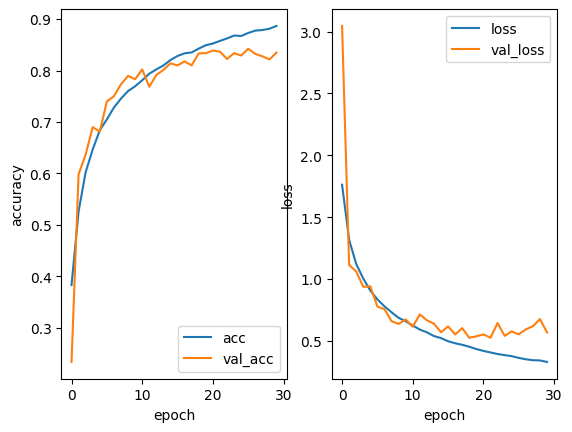

313/313 - 17s - loss: 0.5942 - acc: 0.8261 - 17s/epoch - 55ms/step


In [8]:
import matplotlib.pyplot as plt

plt.figure()

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')

plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)